## Do space-for-time over several chanks and map the fitted slope and intercept

In [1]:
# change working directory to load the code:
import os
os.chdir('/home/return-mmilenkovic/mm_tools/use-case-return')

In [2]:
from auxilary_annalysis_mm import getSlopeInt_qDiff_forAge
import glob
import numpy as np
from scipy.signal import convolve2d
import pandas as pd
#
import matplotlib.pyplot as plt
import time

In [3]:
help(getSlopeInt_qDiff_forAge)

Help on function getSlopeInt_qDiff_forAge in module auxilary_annalysis_mm:

getSlopeInt_qDiff_forAge(myTile, myOrbit, myPol, NumChunks, ChunkStart_col, ChunkStart_row)
    Calculate the slope and intercepth of the linear regression model fitted trough 
    the annual percentile diference (p90 - p10) mean-aggregated over the secoundary forest age.
    
    :param myTile: The Equi7 tile name to be processed, e.g. 'E078N066T3'
    :param myOrbit: The decending orbit to be processed, e.g. 'D039'
    :param myPol: the polarisation chanel (as a string), e.g. 'VV', or 'VH'
    :param NumChunks: the number of chunks to consider for the calculation of slope and intercept 
    :param ChunkStart_col: the column of the starting chank
    :param ChunkStart_row: the row of the starting chank
    :return: a list including linear regresion parameters, performance stats, and nuber of secoundary pixels



Set parameters:

In [4]:
myTile = 'E078N066T3' # Para
myOrbit = 'D039'
myPol = 'VV'
NumChunks = 4
ChunkStart_col = 10
ChunkStart_row = 1

In [5]:
myOut = getSlopeInt_qDiff_forAge(myTile, myOrbit, myPol, NumChunks, ChunkStart_col, ChunkStart_row)

/home/return-mmilenkovic/miniconda3/envs/yeoda/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [6]:
myOut

[-0.0040831022269995085,
 2.83225489679281,
 0.44087673195407806,
 0.04245537103499971,
 120437,
 5988,
 1547]

## Get row and col of ocupied Chanks for the selected orbit:

In [7]:
# set the folter wih the output files:
data_folder = r'/project/return/Share/mm/S1_SA_TEST_UPSCALE/TILE_WISE/AOI_PA/' +  myTile 

In [8]:
# get all nc-files in a list
ncFileList = glob.glob(data_folder + '/**/*' + myOrbit + '_' + myPol + '.nc', recursive=True)
# sorted list:
ncFileList = sorted(ncFileList)

In [9]:
ncRows = [os.path.basename(ncPath).split('_')[1] for ncPath in ncFileList]
ncCols = [os.path.basename(ncPath).split('_')[2] for ncPath in ncFileList]

In [10]:
ncRows_int = [int(aa)   for aa in ncRows]
ncCols_int = [int(aa) for aa in ncCols]

In [11]:
myChankMatrix = np.zeros((60, 60))

In [12]:
myChankMatrix[ncRows_int, ncCols_int] = 1

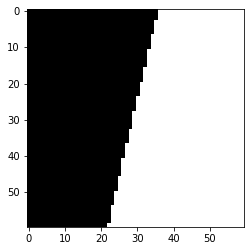

In [13]:
plt.imshow(myChankMatrix, cmap='Greys')

## Prepare the starting rows and columns for the chunk analysis:

In [ ]:
np.ones((4, 4))

In [ ]:
myChankMatrix_con = convolve2d(myChankMatrix, np.ones((4, 4)), 'same' )

In [ ]:
myChankMatrix_con_valid = myChankMatrix_con == 16

In [ ]:
plt.imshow(myChankMatrix_con_valid, cmap='Greys')

In [ ]:
myRows, myCols = np.where(myChankMatrix_con_valid)

In [ ]:
# correct for the upper left start of the kernel:
myRows = myRows - 2 
myCols = myCols - 2

In [ ]:
# sample every 4th element and correct for the index start 1
myRowStarts = myRows[::4] + 1 
myColStarts = myCols[::4] + 1 

In [ ]:
list(zip(myRowStarts, myColStarts))

## Do it for the whole tile:

In [ ]:
# define the panda dataframe to store the output:
df_out = pd.DataFrame(columns=['Row', 'Col', 'Slope', 'Int', 'R2', 'RMSE', 'NumTota', 'NumLarge', 'NumSmall'])

In [ ]:
df_out

In [ ]:
#for myStartRow, myStartCol in zip(myRowStarts, myColStarts):
start = time.time()
for myStartRow, myStartCol in zip(myRowStarts[:1], myColStarts[:1]):
    ChunkStart_col = myStartCol
    ChunkStart_row = myStartRow
    # get the slope and intercept:
    auxOut = getSlopeInt_qDiff_forAge(myTile, myOrbit, myPol, NumChunks, ChunkStart_col, ChunkStart_row)
    # add new row in the dataframe
    df_out.loc[len(df_out)] = [myStartRow, myStartCol] + auxOut
    
end = time.time()

In [ ]:
print(end - start)

In [ ]:
df_out.head()
